In [2]:
import shapefile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import sklearn
import datetime
from shapely.geometry import Polygon, Point, MultiPolygon
import random
import time
import joblib
%matplotlib inline

In [3]:
def read_time(x):
    if x == '-1':
        return -1
    else:
        return datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
def read_point(x):
    x = x[7:-1]
    split = x.find(" ")
    x_coord = float(x[0:split])
    y_coord = float(x[split+1:])
    return Point(x_coord,y_coord)

In [4]:
def check_collision(point):
    collision_list = []
    for poly in distritos_corrected:
        collision_list.append(poly.contains(point))
    return collision_list

def gen_random_point(centroid,k):
    x = centroid.xy[0][0] + random.uniform(-1,1) * k
    y = centroid.xy[1][0] + random.uniform(-1,1) * k
    return Point(x,y)

def gen_accident_coordinates(district):
    try:
        lista_distritos.index(district)
    except ValueError:
        index_distrito = 0
    else:
        index_distrito = lista_distritos.index(district)
    max_dist = 12000
    proposed_point = gen_random_point(centroides_corrected[index_distrito],max_dist)
    while check_collision(proposed_point)[index_distrito] == False:
        max_dist = max_dist/2
        proposed_point = gen_random_point(centroides_corrected[index_distrito],max_dist)
    return proposed_point

In [5]:
dataset = pd.read_csv("Dataset_SAMUR.csv")
dataset.drop(["Unnamed: 0"],axis =1,inplace=True)
dataset["Solicitud"] = dataset["Solicitud"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
dataset["Intervención"] = dataset["Intervención"].apply(lambda x: read_time(x))
points_array = []
for x in dataset["Coordenadas"]:
    points_array.append(read_point(x))
dataset["Coordenadas"] = points_array
dataset.dropna(inplace = True)
dataset["Distrito"].unique()

array(['Centro', 'Carabanchel', 'Salamanca', 'Villa de Vallecas',
       'Tetuán', 'Puente de Vallecas', 'Latina', 'Moratalaz',
       'Villaverde', 'San Blas - Canillejas', 'Ciudad Lineal',
       'Moncloa - Aravaca', 'Chamberí', 'Chamartín', 'Usera', 'Hortaleza',
       'Barajas', 'Arganzuela', 'Retiro', 'Fuencarral - El Pardo',
       'Vicálvaro'], dtype=object)

In [6]:
lista_distritos = joblib.load("Variables Geográficas/lista_distritos")
distritos_corrected = joblib.load("Variables Geográficas/distritos_corrected")
centroides_corrected = joblib.load("Variables Geográficas/centroides_corrected")

In [7]:
dataset

,Año,Mes,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido,Gravedad,IBC,Coordenadas
0,2017,ENERO,Centro,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40,2,0.0,POINT (-1084.985671688465 315.1856405139253)
1,2017,ENERO,Carabanchel,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09,3,256.0,POINT (-1420.483085081759 -2942.78224949467)
2,2017,ENERO,Salamanca,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23,2,1191.0,POINT (1662.930700416665 1816.00590750245)
3,2017,ENERO,Centro,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10,3,467.0,POINT (-895.6722010203512 -101.6973139135703)
4,2017,ENERO,Villa de Vallecas,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33,4,718.0,POINT (8340.751952136179 -5598.25045023518)
...,...,...,...,...,...,...,...,...,...,...,...,...
413830,2019,DICIEMBRE,Hortaleza,Ramón y Cajal,False,2019-12-31 23:12:54,2019-12-31 23:20:13,1,0 days 00:07:19,1,238.0,POINT (4880.367983975168 7293.846347987409)
413831,2019,DICIEMBRE,Chamberí,No derivado,False,2019-12-31 23:26:55,2019-12-31 23:31:16,1,0 days 00:04:21,2,841.0,POINT (388.4047667396669 1704.176576052185)
413832,2019,DICIEMBRE,Chamartín,No derivado,False,2019-12-31 23:28:26,2019-12-31 23:35:50,1,0 days 00:07:24,2,91.0,POINT (2172.846150376582 5669.064673307508)
413833,2019,DICIEMBRE,Latina,Central de la Defensa,False,2019-12-31 23:32:19,2019-12-31 23:37:39,1,0 days 00:05:20,2,233.0,POINT (-5592.575229789772 -3803.442471310741)


In [8]:
def plot_Madrid():
    plt.figure(figsize=(16,16),dpi=100)
    matplotlib.rcParams.update({'font.size': 8})

    for distrito in distritos_corrected:
        x, y = distrito.exterior.coords.xy
        plt.plot(x,y)
    x_centroides = [i.xy[0][0] for i in centroides_corrected]
    y_centroides = [i.xy[1][0] for i in centroides_corrected]
    plt.scatter(x_centroides,y_centroides)
    for i in range(0,len(lista_distritos)):
        plt.text(x_centroides[i],y_centroides[i],lista_distritos[i])

In [9]:
month_to_num = {"ENERO":0,"FEBRERO":1,"MARZO":2,"ABRIL":3,"MAYO":4,"JUNIO":5,"JULIO":6,"AGOSTO":7,"SEPTIEMBRE":8,"OCTUBRE":9,"NOVIEMBRE":10,"DICIEMBRE":11}
templist = []
dataset["Mes_num"] = dataset["Mes"].apply(lambda x: month_to_num.get(x))

In [10]:
dataset["Hora_del_dia"] = dataset["Solicitud"].apply(lambda x: x.hour * 60 + x.minute)

In [11]:
start = datetime.datetime(2017,1,1,0,0,0)
dataset["Dia_desde_2017"] = dataset["Solicitud"].apply(lambda x: (x-start).days)

In [20]:
dataset["Semana"] = dataset["Dia_desde_2017"].apply(lambda x: x//7)

In [21]:
dataset["Hora"] = dataset["Solicitud"].apply(lambda x: x.hour)

In [24]:
dataset

,Año,Mes,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido,Gravedad,IBC,Coordenadas,Mes_num,Hora_del_dia,Dia_desde_2017,Semana,Hora
0,2017,ENERO,Centro,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40,2,0.0,POINT (-1084.985671688465 315.1856405139253),0,23,0,0,0
1,2017,ENERO,Carabanchel,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09,3,256.0,POINT (-1420.483085081759 -2942.78224949467),0,27,0,0,0
2,2017,ENERO,Salamanca,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23,2,1191.0,POINT (1662.930700416665 1816.00590750245),0,47,0,0,0
3,2017,ENERO,Centro,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10,3,467.0,POINT (-895.6722010203512 -101.6973139135703),0,55,0,0,0
4,2017,ENERO,Villa de Vallecas,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33,4,718.0,POINT (8340.751952136179 -5598.25045023518),0,67,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413830,2019,DICIEMBRE,Hortaleza,Ramón y Cajal,False,2019-12-31 23:12:54,2019-12-31 23:20:13,1,0 days 00:07:19,1,238.0,POINT (4880.367983975168 7293.846347987409),11,1392,1094,156,23
413831,2019,DICIEMBRE,Chamberí,No derivado,False,2019-12-31 23:26:55,2019-12-31 23:31:16,1,0 days 00:04:21,2,841.0,POINT (388.4047667396669 1704.176576052185),11,1406,1094,156,23
413832,2019,DICIEMBRE,Chamartín,No derivado,False,2019-12-31 23:28:26,2019-12-31 23:35:50,1,0 days 00:07:24,2,91.0,POINT (2172.846150376582 5669.064673307508),11,1408,1094,156,23
413833,2019,DICIEMBRE,Latina,Central de la Defensa,False,2019-12-31 23:32:19,2019-12-31 23:37:39,1,0 days 00:05:20,2,233.0,POINT (-5592.575229789772 -3803.442471310741),11,1412,1094,156,23


[]

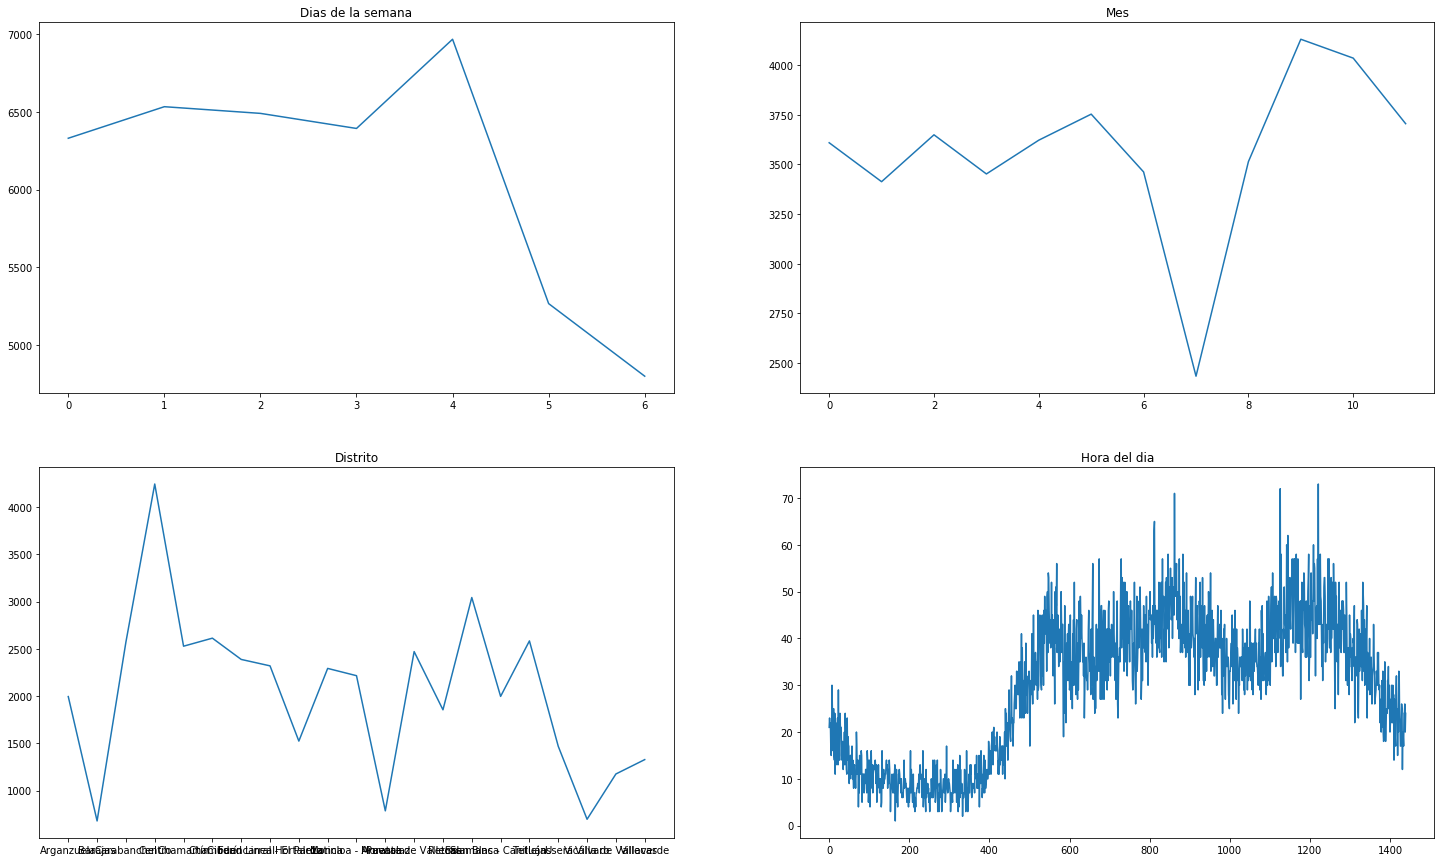

In [25]:
gravedad_target = 5
plt.figure(figsize=(25,15))
temp = dataset[dataset["Gravedad"] == gravedad_target]
unique_elements, counts_elements = np.unique(temp["Dia de la semana"], return_counts=True)
plt.subplot(2, 2, 1)
plt.plot(unique_elements,counts_elements)
plt.title("Dias de la semana")
unique_elements, counts_elements = np.unique(temp["Mes_num"], return_counts=True)
plt.subplot(2,2,2)
plt.plot(unique_elements,counts_elements)
plt.title("Mes")
unique_elements, counts_elements = np.unique(temp["Distrito"], return_counts=True)
plt.subplot(2, 2, 3)
plt.plot(unique_elements,counts_elements)
plt.title("Distrito")
unique_elements, counts_elements = np.unique(temp["Hora_del_dia"], return_counts=True)
plt.subplot(2, 2, 4)
plt.plot(unique_elements,counts_elements)
plt.title("Hora del dia")
plt.plot()

In [26]:
def array_prob(x):
    y = 0
    for i in x:
        y +=i
    z = []
    for i in x:
        z.append(i/y)
    return z

[]

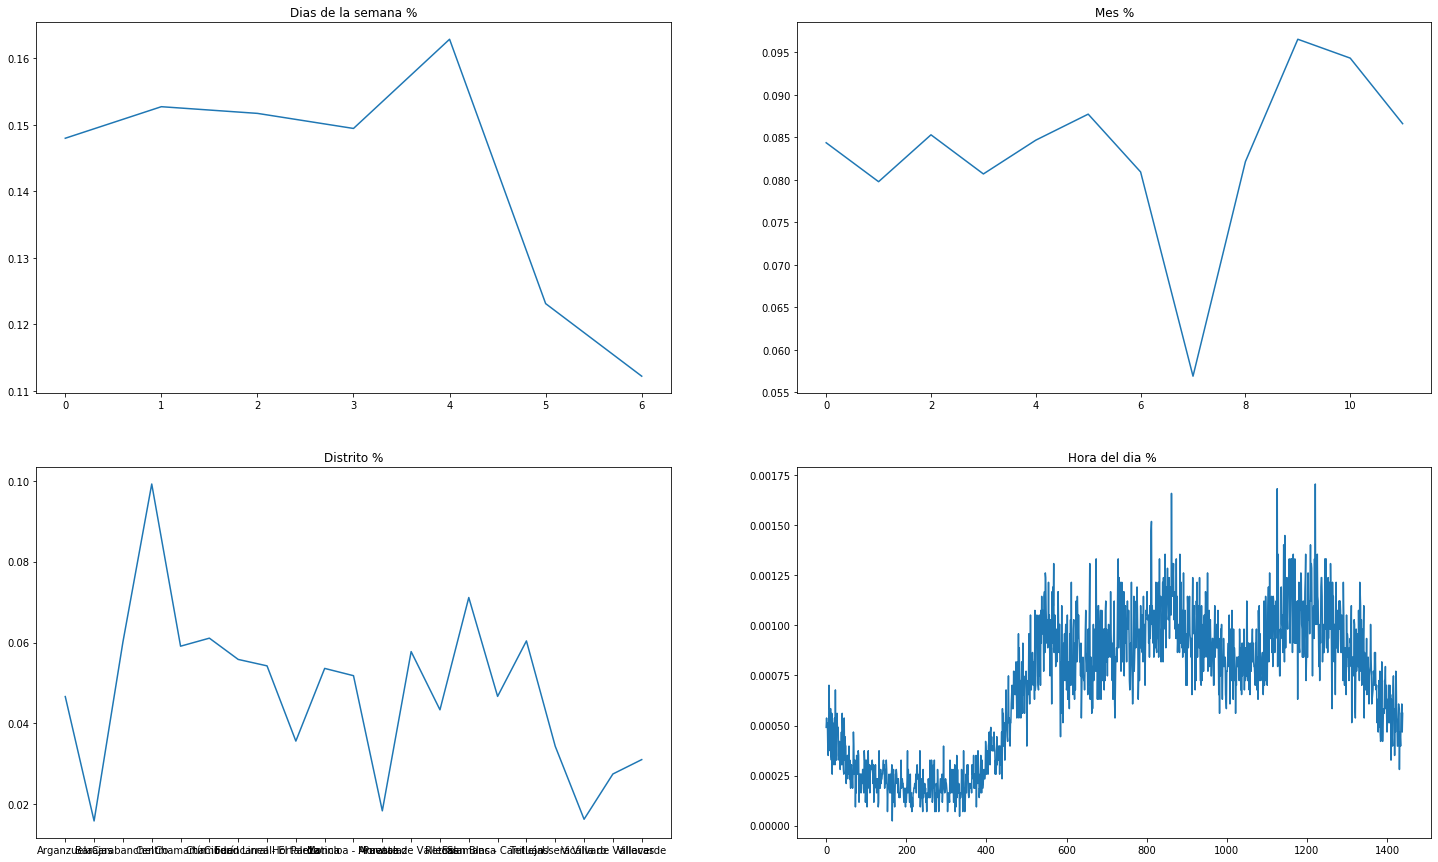

In [27]:
gravedad_target = 5
plt.figure(figsize=(25,15))
temp = dataset[dataset["Gravedad"] == gravedad_target]
unique_elements, counts_elements = np.unique(temp["Dia de la semana"], return_counts=True)
probs = array_prob(counts_elements)
plt.subplot(2, 2, 1)
plt.plot(unique_elements,probs)
plt.title("Dias de la semana %")
unique_elements, counts_elements = np.unique(temp["Mes_num"], return_counts=True)
probs = array_prob(counts_elements)
plt.subplot(2,2,2)
plt.plot(unique_elements,probs)
plt.title("Mes %")
unique_elements, counts_elements = np.unique(temp["Distrito"], return_counts=True)
probs = array_prob(counts_elements)
plt.subplot(2, 2, 3)
plt.plot(unique_elements,probs)
plt.title("Distrito %")
unique_elements, counts_elements = np.unique(temp["Hora_del_dia"], return_counts=True)
probs = array_prob(counts_elements)
plt.subplot(2, 2, 4)
plt.plot(unique_elements,probs)
plt.title("Hora del dia % ")
plt.plot()

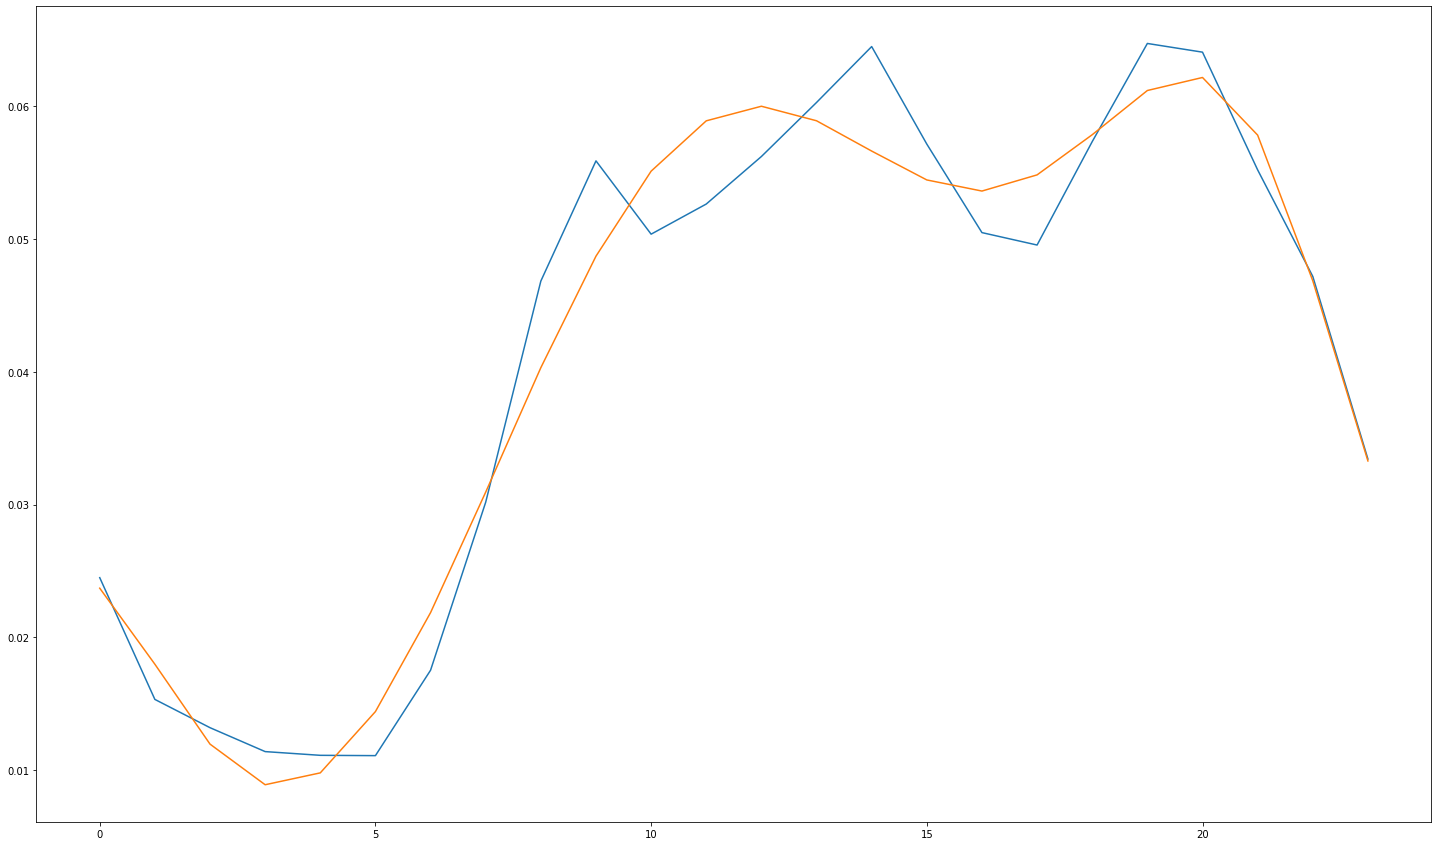

In [33]:
plt.figure(figsize=(25,15))
unique_elements, counts_elements = np.unique(temp["Hora"], return_counts=True)
probs = array_prob(counts_elements)
plt.plot(unique_elements,probs)
fitt = np.poly1d(np.polyfit(unique_elements,probs,9))
y_fit = []
for x in unique_elements:
    y_fit.append(fitt(x))
plt.plot(unique_elements,y_fit)

[]

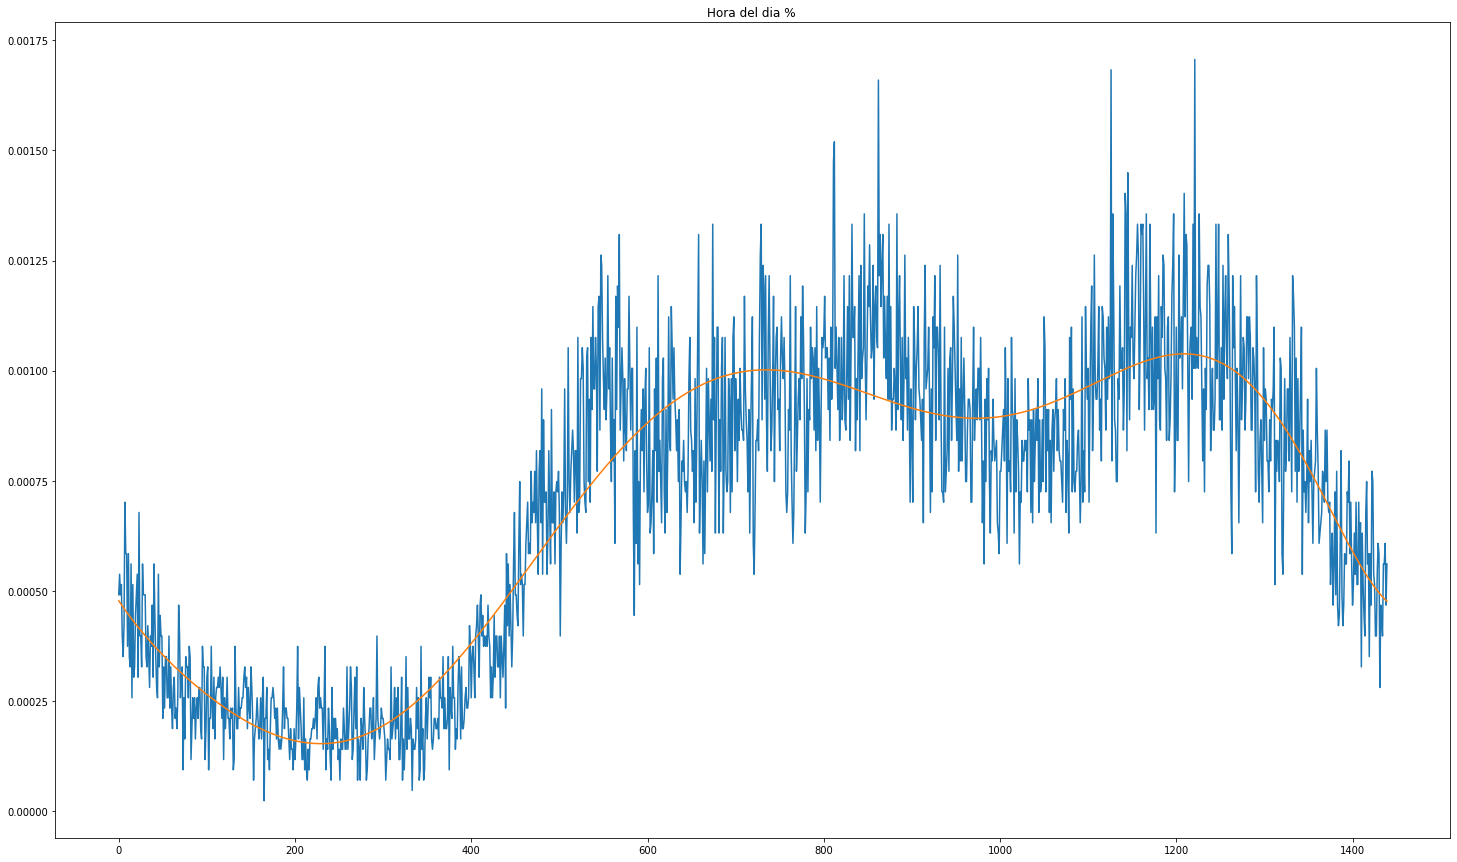

In [29]:
plt.figure(figsize=(25,15))
temp = dataset[dataset["Gravedad"] == gravedad_target]
unique_elements, counts_elements = np.unique(temp["Hora_del_dia"], return_counts=True)
probs = array_prob(counts_elements)
fitt = np.poly1d(np.polyfit(unique_elements,probs,8))
plt.plot(unique_elements,probs)
plt.title("Hora del dia % ")
y_fit = []
for x in unique_elements:
    y_fit.append(fitt(x))
plt.plot(unique_elements,y_fit)
plt.plot()

In [18]:
master_prob_lookup = []
for gravedad in range(1,6):
    grav_array = []
    temp = dataset[dataset["Gravedad"] == gravedad_target]
    unique_elements, counts_elements = np.unique(temp["Hora_del_dia"], return_counts=True)
    probs = array_prob(counts_elements)
    eq = np.poly1d(np.polyfit(unique_elements,probs,32))
    grav_array.append([eq(x)for x in unique_elements])
    unique_elements, counts_elements = np.unique(temp["Mes_num"], return_counts=True)
    grav_array.append(array_prob(counts_elements))
    unique_elements, counts_elements = np.unique(temp["Dia de la semana"], return_counts=True)
    grav_array.append(array_prob(counts_elements)) 
    unique_elements, counts_elements = np.unique(temp["Distrito"], return_counts=True)
    grav_array.append(dict(zip(unique_elements, array_prob(counts_elements))))
    master_prob_lookup.append(grav_array)

/home/algadoc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/algadoc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/algadoc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/algadoc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/algadoc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


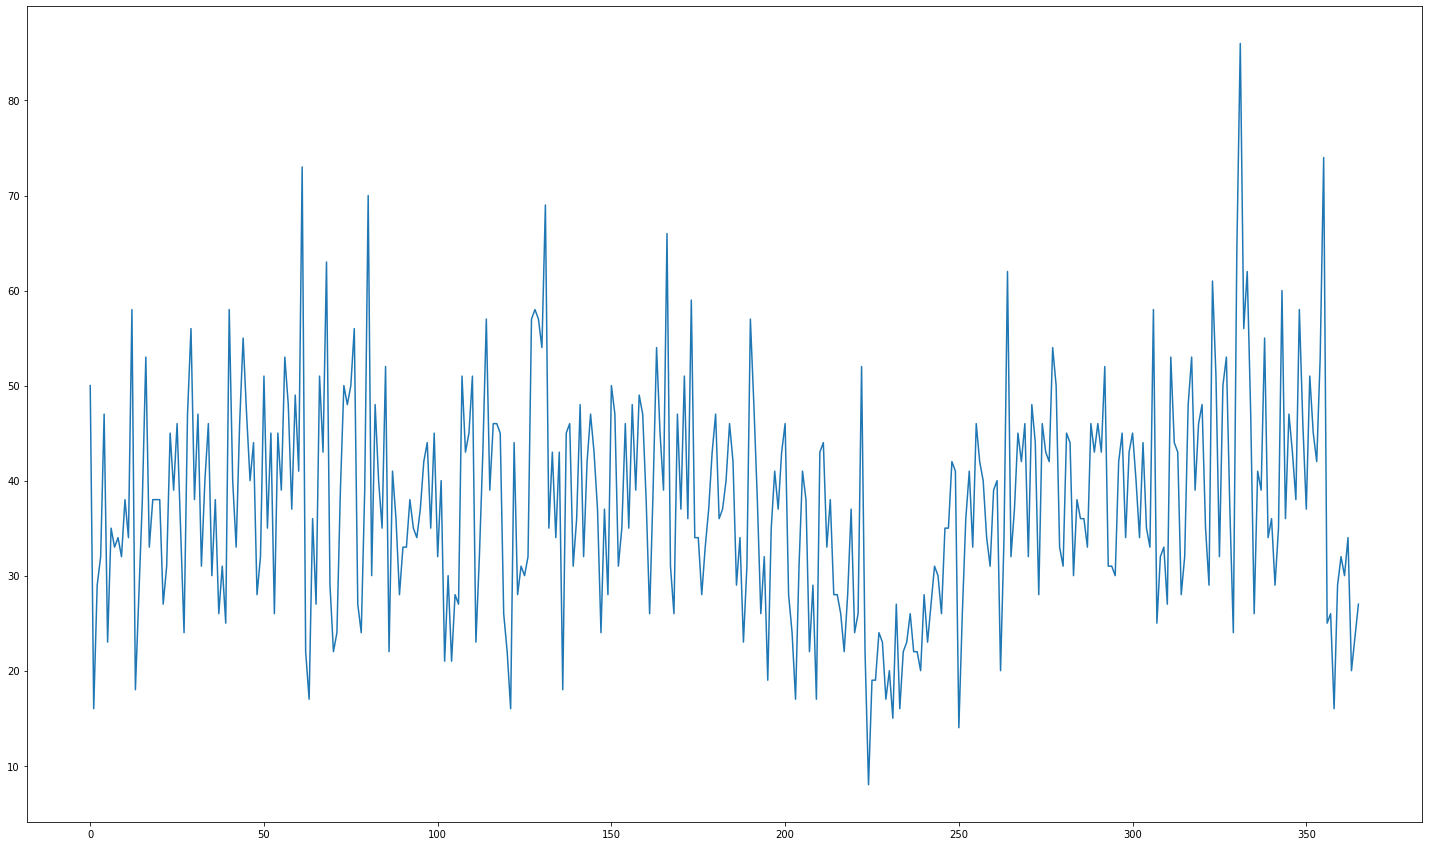

In [19]:
gravedad_target = 5
plt.figure(figsize=(25,15))
temp = dataset[(dataset["Gravedad"] == gravedad_target) & (dataset["Dia_desde_2017"] <= 365)]
unique_elements, counts_elements = np.unique(temp["Dia_desde_2017"], return_counts=True)
plt.plot(unique_elements,counts_elements)

In [20]:
def will_generate_accident(gravity,minute,month,day,district,stress):
    prob = master_prob_lookup[gravity-1]
    percent = prob[0][minute]*prob[1][month]*prob[2][day]*prob[3].get(district)*stress
    not_percent = (1-percent) 
    return random.choices([True,False],[percent,not_percent])[0]
will_generate_accident(1,0,0,0,"Centro",16)

False

In [21]:
total_accidentes = 0
dia_de_la_semana = 0
mes = 10
horas_accidentes = []
for district in lista_distritos:
    for gravedad in range(1,6):
        for i in range(0,1440):
            willit = will_generate_accident(gravedad,i,mes,dia_de_la_semana,district,1000)
            if willit :
                total_accidentes += 1
                horas_accidentes.append(i)
total_accidentes

66

/home/algadoc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[]

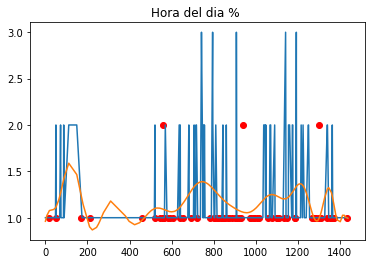

In [22]:
temp = dataset[dataset["Dia_desde_2017"] == 25]
unique_elements, counts_elements = np.unique(temp["Hora_del_dia"], return_counts=True)
probs = array_prob(counts_elements)
fitt = np.poly1d(np.polyfit(unique_elements,counts_elements,32))
plt.plot(unique_elements,counts_elements)
plt.title("Hora del dia % ")

x_fit = []
y_fit = []
for x in unique_elements:
    y_fit.append(fitt(x))
plt.plot(unique_elements,y_fit)
unique_elements, counts_elements = np.unique(horas_accidentes, return_counts=True)
plt.scatter(unique_elements,counts_elements,c="red")

plt.plot()

In [23]:
dataset

,Año,Mes,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido,Gravedad,IBC,Coordenadas,Mes_num,Hora_del_dia,Dia_desde_2017,Semana
0,2017,ENERO,Centro,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40,2,0.0,POINT (-1084.985671688465 315.1856405139253),0,23,0,0
1,2017,ENERO,Carabanchel,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09,3,256.0,POINT (-1420.483085081759 -2942.78224949467),0,27,0,0
2,2017,ENERO,Salamanca,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23,2,1191.0,POINT (1662.930700416665 1816.00590750245),0,47,0,0
3,2017,ENERO,Centro,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10,3,467.0,POINT (-895.6722010203512 -101.6973139135703),0,55,0,0
4,2017,ENERO,Villa de Vallecas,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33,4,718.0,POINT (8340.751952136179 -5598.25045023518),0,67,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413830,2019,DICIEMBRE,Hortaleza,Ramón y Cajal,False,2019-12-31 23:12:54,2019-12-31 23:20:13,1,0 days 00:07:19,1,238.0,POINT (4880.367983975168 7293.846347987409),11,1392,1094,156
413831,2019,DICIEMBRE,Chamberí,No derivado,False,2019-12-31 23:26:55,2019-12-31 23:31:16,1,0 days 00:04:21,2,841.0,POINT (388.4047667396669 1704.176576052185),11,1406,1094,156
413832,2019,DICIEMBRE,Chamartín,No derivado,False,2019-12-31 23:28:26,2019-12-31 23:35:50,1,0 days 00:07:24,2,91.0,POINT (2172.846150376582 5669.064673307508),11,1408,1094,156
413833,2019,DICIEMBRE,Latina,Central de la Defensa,False,2019-12-31 23:32:19,2019-12-31 23:37:39,1,0 days 00:05:20,2,233.0,POINT (-5592.575229789772 -3803.442471310741),11,1412,1094,156


In [253]:
def gen_year_list(year):
    month_list = [i for i in range(0,12)]
    start_date = datetime.date(year,1,1)
    weekdays = []
    for i in month_list:
        temp = []
        try:
            datetime.date(year,i+1,31)
        except ValueError:
            try:
                datetime.date(year,i+1,30)
            except ValueError:
                enddate = datetime.date(year,i+1,28)
            else:
                enddate = datetime.date(year,i+1,30)
        else:
            enddate = datetime.date(year,i+1,31)
        while start_date <= enddate:
            temp.append(start_date.weekday())
            start_date += datetime.timedelta(days=1)
        weekdays.append(temp)
    return (month_list,weekdays)

In [282]:
    grav = []
    for gravity in range(1,6):
        day = -1
        cases_and_day = []
        year_list = gen_year_list(2018)
        for p in range(0,12):
            month = year_list[0][p]
            weekday_list = year_list[1][p]
            for weekday in weekday_list:   
                day += 1
                for t in range(0,1440):
                    for district in lista_distritos:
                         if will_generate_accident(gravity,t,month,weekday,district,3750):
                            cases_and_day.append(day)
        grav.append(cases_and_day)

In [276]:
len(cases_and_day)

17555

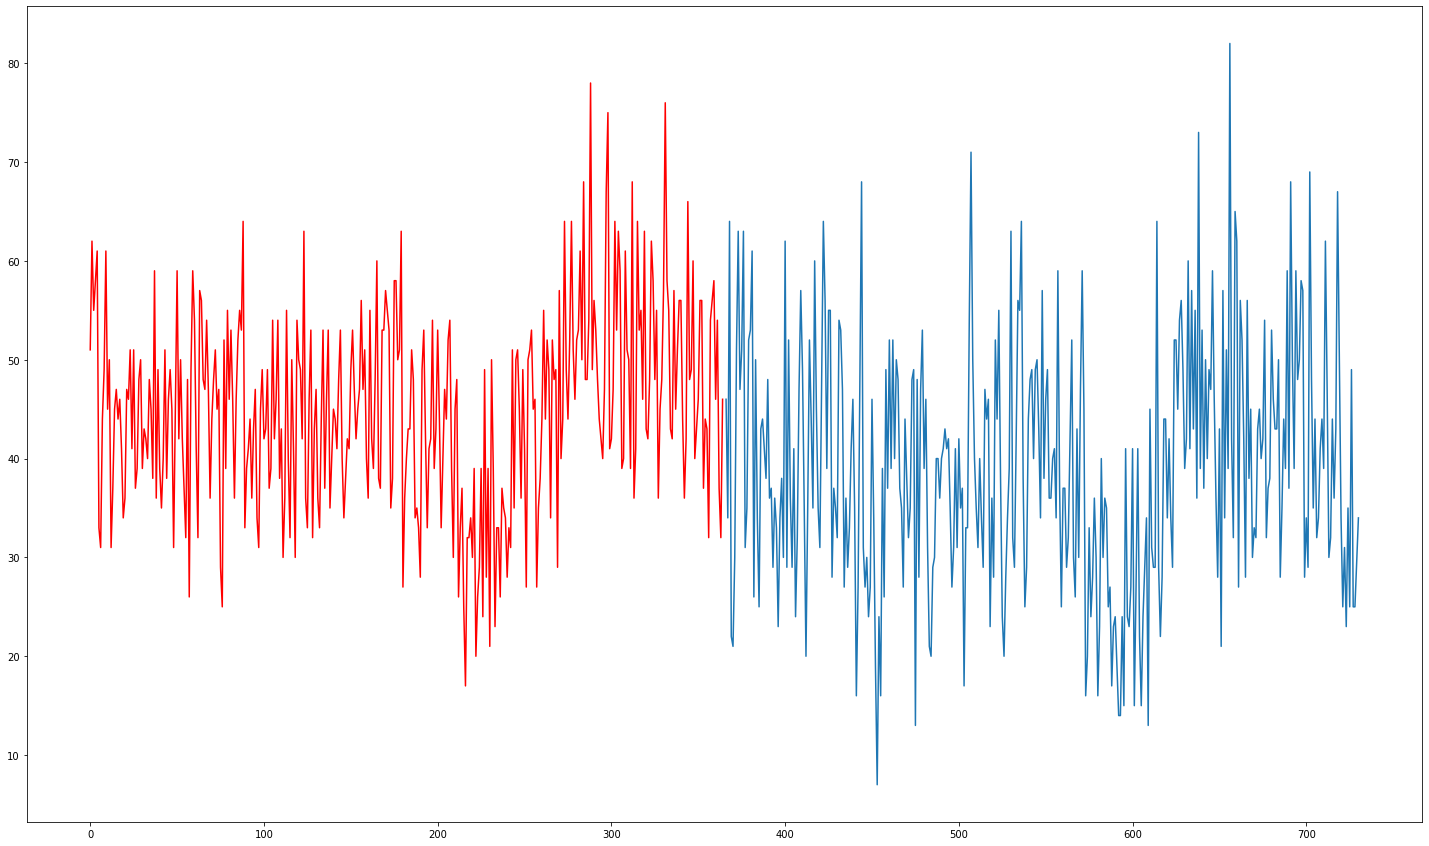

In [283]:
gravedad_target = 5
plt.figure(figsize=(25,15))
temp = dataset[(dataset["Gravedad"] == gravedad_target) & (dataset["Dia_desde_2017"] > 365) & (dataset["Dia_desde_2017"] <= 730)]
unique_elements, counts_elements = np.unique(temp["Dia_desde_2017"], return_counts=True)
plt.plot(unique_elements,counts_elements)
unique_elements, counts_elements = np.unique(cases_and_day, return_counts=True)
plt.plot(unique_elements,counts_elements,c="red")

In [18]:
#Rango de 4000 a 3250,+-

In [19]:
dataset.to_csv("DAtaset_SAMUR_Distribuciones.csv")